In [1]:
import pandas as pd;import numpy as np; import matplotlib.pyplot as plt; 

from matplotlib.colors import LogNorm,Normalize
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,AutoMinorLocator)

In [2]:
from IPython.display import display_html
def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)

In [3]:
# This function extracts the outlier points (the red points) from the z catalogue. 
def outlier_points(zp,zs):
        tmp_x      = np.where( (zp > float(0.300)) & (zp < float(3.0)) )[0]
        tmp_ztrue  = zs[tmp_x]
        tmp_z_phot  = zp[tmp_x]
        tmp_dz     = ( tmp_ztrue - tmp_z_phot ) / ( 1.0 + tmp_z_phot )
        q75, q25   = np.percentile( tmp_dz, [75 ,25]) # COR IQR
        sigma      = ( q75 - q25 ) / float(1.349)
        threesigma = float(3.0) * sigma
        ox = np.where( ( np.fabs( tmp_dz ) > float(0.0600) ) & ( np.fabs( tmp_dz ) > threesigma ) )[0]
        tmp_z_phot1=[];tmp_z_true1=[];
        for i in range(len(ox)):
            tmp_z_phot1.append(tmp_z_phot.iloc[ox[i]])
            tmp_z_true1.append(tmp_ztrue.iloc[ox[i]])
        zp = pd.DataFrame(tmp_z_phot1)
        zs = pd.DataFrame(tmp_z_true1)  
        zt = pd.concat([zp,zs],axis=1)
        zt.columns = ['zphoto','zspec']
        return zt

In [4]:
def cat_outlier(zp,zs):
        tmp_x      = np.where( (zp > float(0.300)) & (zp <= float(3.0)) )[0] # Change here 0 or 0.300
        tmp_ztrue  = zs[tmp_x]
        tmp_z_phot  = zp[tmp_x]
        tmp_dz     = ( tmp_ztrue - tmp_z_phot )
        ox = np.where( np.fabs( tmp_dz ) > float(1.5) )[0]
        tmp_z_phot1=[];tmp_z_true1=[];
        for i in range(len(ox)):
            tmp_z_phot1.append(tmp_z_phot.iloc[ox[i]])
            tmp_z_true1.append(tmp_ztrue.iloc[ox[i]])
        zp = pd.DataFrame(tmp_z_phot1)
        zs = pd.DataFrame(tmp_z_true1)  
        zt = pd.concat([zp,zs],axis=1)
        zt.columns = ['zphoto','zspec']
        return zt  

In [5]:
bb = pd.read_csv('wfirst_data.csv',sep=" ")# photoz catalogue

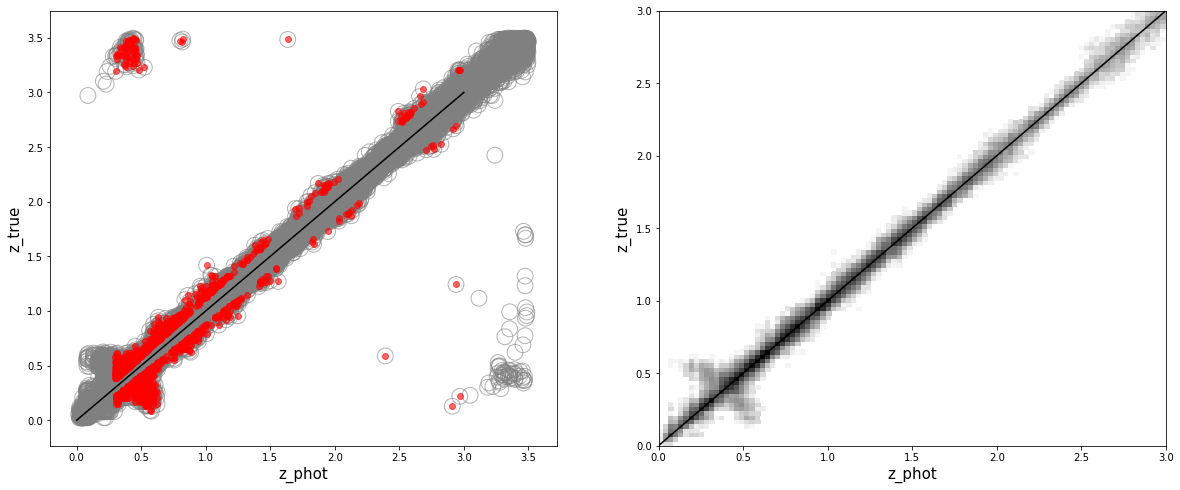

In [6]:
plt.rcParams['figure.figsize'] = [20,8] 
plt.subplot(1,2,1)
tx = np.where( bb.z_phot > 0.0 )[0]
#plt.hist2d( bb.z_phot[tx], bb.z_true[tx], bins=100, range=[[0.0,3.0],[0.0,3.0]], norm=LogNorm(clip=True), \
 #           cmin=1, cmap='Greys');
plt.xlabel('z_phot',fontsize=15);plt.ylabel('z_true',fontsize=15)
plt.plot(outlier_points(bb['z_phot'],bb['z_true']).zphoto,outlier_points(bb['z_phot'],bb['z_true']).zspec,'o',
         alpha=0.6,c='r')
plt.scatter(bb.z_phot,bb.z_true,s=250,facecolors='none', edgecolors='grey',alpha=0.6)
plt.plot([0.0,3.0],[0.0,3.0],color='black')
#plt.axhline(0.1)
#plt.axvline(1.2)

plt.subplot(1,2,2)
tx = np.where( bb.z_phot > 0.0 )[0]
#plt.rcParams['figure.figsize'] = [10,8] 
plt.hist2d( bb.z_phot[tx], bb.z_true[tx], bins=100, range=[[0.0,3.0],[0.0,3.0]], norm=LogNorm(clip=True), \
            cmin=1, cmap='Greys',alpha=2.5);

plt.xlabel('z_phot',fontsize=15);plt.ylabel('z_true',fontsize=15)

plt.plot([0.0,3.0],[0.0,3.0],color='black')
#plt.axhline(0.1)
#plt.axvline(1.2)

# The minimum z_true in outliers is 0.083. Which is > than the first bin [0-0.05] in case of 24 bins are chosen. Therefore there is problem in the first redshift bin, while computing.

In [7]:
np.min(outlier_points(bb['z_phot'],bb['z_true']).zspec)

0.083

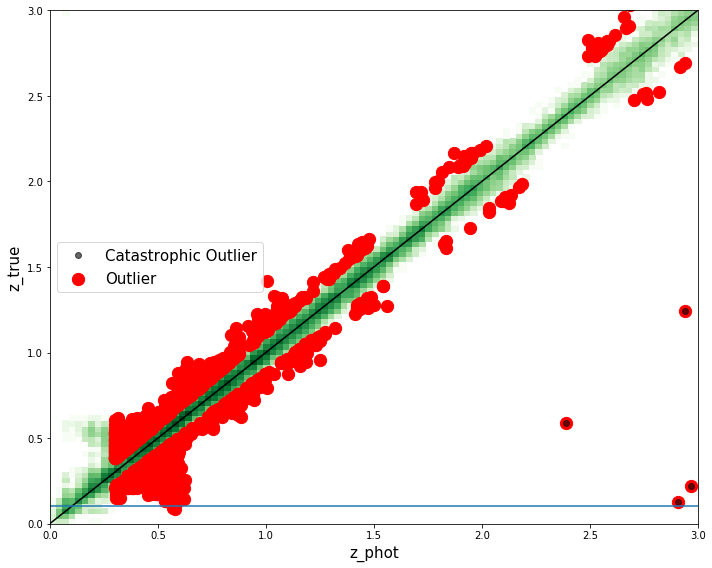

In [8]:
tx = np.where( bb.z_phot > 0.0 )[0]
plt.rcParams['figure.figsize'] = [10,8] 
plt.hist2d( bb.z_phot[tx], bb.z_true[tx], bins=100, range=[[0.0,3.0],[0.0,3.0]], norm=LogNorm(clip=True), \
            cmin=1, cmap='Greens');
plt.xlabel('z_phot',fontsize=15);plt.ylabel('z_true',fontsize=15)

#plt.plot(outlier_points(bb['z_phot'],bb['z_true']).zphoto,outlier_points(bb['z_phot'],bb['z_true']).zspec,'o',
 #        alpha=0.3,c='b')

plt.plot(cat_outlier(bb['z_phot'],bb['z_true']).zphoto,cat_outlier(bb['z_phot'],bb['z_true']).zspec,'o',
         alpha=0.6,c='black',label='Catastrophic Outlier')# In outlier fn, change limit from 0 to 3

plt.scatter(outlier_points(bb['z_phot'],bb['z_true']).zphoto,outlier_points(bb['z_phot'],bb['z_true']).zspec,
            s=150,c='r',label='Outlier')
plt.plot([0.0,3.0],[0.0,3.0],color='black')
#plt.xlim(0.,0.8)
#plt.ylim(1.5,3.0)
plt.axhline(0.1)
plt.tight_layout()
plt.legend(fontsize=15)
plt.savefig('tzpz_from_zphot_cat-catastrophic_check1_WFIRST.pdf',bbox_inches='tight')

In [9]:
print('Catastrophic Outliers')
len(cat_outlier(bb['z_phot'],bb['z_true']).zphoto)

Catastrophic Outliers


73

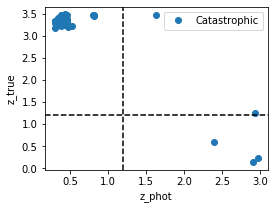

In [10]:
plt.rcParams['figure.figsize'] = [4, 3]
plt.plot(cat_outlier(bb['z_phot'],bb['z_true']).zphoto,
         cat_outlier(bb['z_phot'],bb['z_true']).zspec,'o',label='Catastrophic')
plt.axhline(1.2,c='black',linestyle='--');plt.axvline(1.2,c='black',linestyle='--')
plt.xlabel('z_phot');plt.ylabel('z_true')
plt.legend()

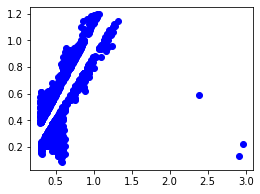

In [11]:
columns=['x','y']
index=range(0,len(outlier_points(bb['z_phot'],bb['z_true']).zphoto))
r_core = pd.DataFrame(columns=columns,index=index)
r_core['x']=outlier_points(bb['z_phot'],bb['z_true']).zphoto
r_core['y']=outlier_points(bb['z_phot'],bb['z_true']).zspec

r_core = r_core.sort_values('y')   
r_core.reset_index(inplace = True, drop = True) 
r_core = r_core.sort_values(by=['y']) 
r_core = r_core[r_core.y<=1.2]
plt.plot(r_core.x,r_core.y,'o',c='b',label=r'$\rm |COR\_Val|<=1.5$')   
#plt.xlim(0,3.0);plt.ylim(0,3.0)

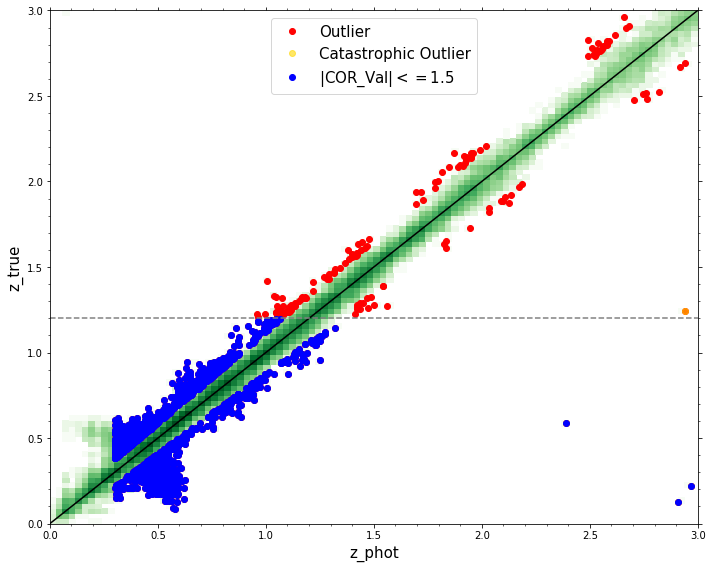

In [12]:
tx = np.where( bb.z_phot > 0.0 )[0]
plt.rcParams['figure.figsize'] = [10,8] 
fig, ax = plt.subplots()
plt.hist2d( bb.z_phot[tx], bb.z_true[tx], bins=100, range=[[0.0,3.0],[0.0,3.0]], norm=LogNorm(clip=True), \
            cmin=1, cmap='Greens');
plt.xlabel('z_phot',fontsize=15);plt.ylabel('z_true',fontsize=15)
plt.plot(outlier_points(bb['z_phot'],bb['z_true']).zphoto,outlier_points(bb['z_phot'],bb['z_true']).zspec,'o',
         alpha=0.99,c='r',label='Outlier')
plt.plot(cat_outlier(bb['z_phot'],bb['z_true']).zphoto,cat_outlier(bb['z_phot'],bb['z_true']).zspec,'o',
         alpha=0.6,c='gold',label='Catastrophic Outlier')
#plt.scatter(outlier_points(bb['z_phot'],bb['z_true']).zphoto,outlier_points(bb['z_phot'],bb['z_true']).zspec,
 #           s=150,c='r',label='Outlier')
plt.plot(r_core.x,r_core.y,'o',c='b',label=r'$\rm |COR\_Val|<=1.5$')    
plt.plot([0.0,3.0],[0.0,3.0],color='black')
#plt.xlim(0.,0.3)
#plt.ylim(2.0,3.0)
plt.axhline(1.2,c='grey',linestyle='--')
plt.tight_layout()
plt.legend(loc='upper center',fontsize=15)
ax.minorticks_on()
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
#plt.savefig('Meliisa_email_plots/tzpz_from_zphot_cat-catastrophic_check2.pdf',bbox_inches='tight')
plt.savefig('P2.pdf',bbox_inches='tight')

### Binning the data to compute the mean redshifts per bin and the no. of candidates
#### This is for the grey points

In [13]:
# Binning the data to compute the mean redshifts per bin and the no. of candidates
bins = np.linspace(0,3.3,34)
label = np.linspace(0.05,3.25,33)
bb['bin_z'] = pd.cut(bb.z_true, bins=bins)#, labels=label)

N = pd.DataFrame(bb.groupby(pd.cut(bb.z_true, bins=bins,labels=label)).count()).z_true
N = pd.DataFrame(np.array(N))
N.columns = ['N']
N.reset_index(drop=True, inplace=True)

tzpz_main = bb.groupby(pd.cut(bb.z_true, bins=bins,labels=label)).mean()
tzpz_main.columns = ['z_true_mean','z_phot_mean']
tzpz_main.reset_index(drop=True, inplace=True)
tzpz_main =  pd.concat([tzpz_main,N],axis=1,ignore_index=True)
tzpz_main =  pd.concat([tzpz_main,pd.DataFrame(label)],axis=1,ignore_index=True)
tzpz_main.columns = ['z_true_mean','z_phot_mean','N','Bin']
tzpz_main = tzpz_main[['Bin','N','z_true_mean','z_phot_mean']]
tzpz_main = tzpz_main.iloc[0:12 , : ]
#tzpz_main = tzpz_main.sort_values('z_true_mean')  

In [14]:
bb

,z_true,z_phot,bin_z
0,0.0170,0.0461,"(0.0, 0.1]"
1,0.0202,0.0494,"(0.0, 0.1]"
2,0.0205,0.0224,"(0.0, 0.1]"
3,0.0222,0.0875,"(0.0, 0.1]"
4,0.0223,0.2089,"(0.0, 0.1]"
...,...,...,...
178457,3.4967,3.4699,NaN
178458,3.4969,3.4647,NaN
178459,3.4971,0.4368,NaN
178460,3.4981,3.3841,NaN


In [15]:
tzpz_main

,Bin,N,z_true_mean,z_phot_mean
0,0.05,1304,0.079959,0.087680
1,0.15,2475,0.159723,0.164787
2,0.25,9714,0.251056,0.264840
3,0.35,9161,0.346519,0.361497
4,0.45,15313,0.452954,0.448169
5,0.55,16024,0.554583,0.542307
6,0.65,17269,0.645306,0.642620
7,0.75,14581,0.754370,0.756054
8,0.85,12743,0.844598,0.838298
9,0.95,13555,0.954417,0.952653


#### This is for the outlier points (red dots)

In [16]:
tzpz_out = outlier_points(bb['z_phot'],bb['z_true'])
tzpz_out = tzpz_out.sort_values('zspec')  
#tzpz_out.to_csv('tzpz_plotting/tzpz_plotting_data_red.csv',sep=' ',index=False)

In [17]:
bins = np.linspace(0,3.3,34)
label = np.linspace(0.05,3.25,33)
tzpz_out['bin_z'] = pd.cut(tzpz_out.zspec, bins=bins)#, labels=label)

N = pd.DataFrame(tzpz_out.groupby(pd.cut(tzpz_out.zspec, bins=bins,labels=label)).count()).zspec
N = pd.DataFrame(np.array(N))
N.columns = ['N']
N.reset_index(drop=True, inplace=True)

tzpz_outt = tzpz_out.groupby(pd.cut(tzpz_out.zspec, bins=bins,labels=label)).mean()
tzpz_outt.columns = ['z_true_mean','z_phot_mean']
tzpz_outt.reset_index(drop=True, inplace=True)
tzpz_outt =  pd.concat([tzpz_outt,N],axis=1,ignore_index=True)
tzpz_outt =  pd.concat([tzpz_outt,pd.DataFrame(label)],axis=1,ignore_index=True)
tzpz_outt.columns = ['z_true_mean','z_phot_mean','N','Bin']
tzpz_outt = tzpz_outt[['Bin','N','z_true_mean','z_phot_mean']]
tzpz_outt = tzpz_outt.iloc[0:12 , :]
#tzpz_outt = tzpz_outt.sort_values('z_true_mean')  

In [18]:
tzpz_outt

,Bin,N,z_true_mean,z_phot_mean
0,0.05,2,0.574050,0.086550
1,0.15,53,0.549951,0.170272
2,0.25,631,0.487984,0.252856
3,0.35,640,0.471255,0.346094
4,0.45,790,0.380915,0.460194
5,0.55,478,0.415896,0.540469
6,0.65,149,0.603627,0.645330
7,0.75,180,0.706768,0.755806
8,0.85,191,0.746479,0.852929
9,0.95,119,0.866720,0.946655


In [19]:
tzpz_out.describe()

,zphoto,zspec
count,3532.000000,3532.000000
mean,0.560184,0.599673
std,0.331853,0.536173
min,0.300100,0.083000
25%,0.385300,0.321875
50%,0.476550,0.466600
75%,0.572525,0.630150
max,2.968400,3.497100


In [20]:
tzpz_outt['f_out'] = tzpz_outt.N/(tzpz_main.N)

In [21]:
tzpz_outt

,Bin,N,z_true_mean,z_phot_mean,f_out
0,0.05,2,0.574050,0.086550,0.001534
1,0.15,53,0.549951,0.170272,0.021414
2,0.25,631,0.487984,0.252856,0.064958
3,0.35,640,0.471255,0.346094,0.069861
4,0.45,790,0.380915,0.460194,0.051590
5,0.55,478,0.415896,0.540469,0.029830
6,0.65,149,0.603627,0.645330,0.008628
7,0.75,180,0.706768,0.755806,0.012345
8,0.85,191,0.746479,0.852929,0.014989
9,0.95,119,0.866720,0.946655,0.008779


In [22]:
test = pd.concat([tzpz_main,tzpz_outt.iloc[: , 1:]],axis=1)
test.columns = ['Bin','N_G','z_true_mean_G','z_phot_mean_G','N_R','z_true_mean_R','z_phot_mean_R','fout']

In [23]:
test['COR_Outlier_Bias'] = (test.z_true_mean_R - test.z_phot_mean_R)/(1+test.z_phot_mean_R)

### We combine the two files. We identify the gray points with 'G' and red (outlier points) with 'R'. 
#### N = No. of Points in that bin

In [24]:
test

,Bin,N_G,z_true_mean_G,z_phot_mean_G,N_R,z_true_mean_R,z_phot_mean_R,fout,COR_Outlier_Bias
0,0.05,1304,0.079959,0.087680,2,0.574050,0.086550,0.001534,0.448668
1,0.15,2475,0.159723,0.164787,53,0.549951,0.170272,0.021414,0.324437
2,0.25,9714,0.251056,0.264840,631,0.487984,0.252856,0.064958,0.187674
3,0.35,9161,0.346519,0.361497,640,0.471255,0.346094,0.069861,0.092981
4,0.45,15313,0.452954,0.448169,790,0.380915,0.460194,0.051590,-0.054293
5,0.55,16024,0.554583,0.542307,478,0.415896,0.540469,0.029830,-0.080867
6,0.65,17269,0.645306,0.642620,149,0.603627,0.645330,0.008628,-0.025346
7,0.75,14581,0.754370,0.756054,180,0.706768,0.755806,0.012345,-0.027929
8,0.85,12743,0.844598,0.838298,191,0.746479,0.852929,0.014989,-0.057450
9,0.95,13555,0.954417,0.952653,119,0.866720,0.946655,0.008779,-0.041062


In [25]:
test.to_csv('tzpz_bin_data_WFIRST.csv',sep=' ',index=False)

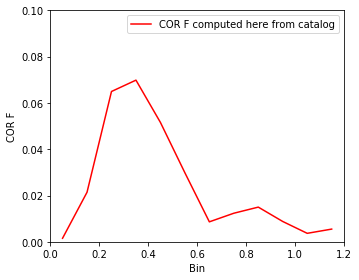

In [26]:
plt.rcParams['figure.figsize'] = [5,4]


plt.xlabel('Bin')
plt.ylabel('COR F')
plt.tight_layout()

plt.plot(tzpz_outt.Bin,tzpz_outt.N/(tzpz_main.N),c='r',label = 'COR F computed here from catalog')
plt.xlim(0,1.2)
plt.ylim(0,0.1)
plt.legend()

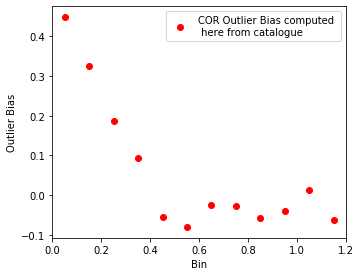

In [27]:
outlier_bias = (tzpz_outt.z_true_mean - tzpz_outt.z_phot_mean)/(1+tzpz_outt.z_phot_mean)
plt.rcParams['figure.figsize'] = [5,4]

plt.xlabel('Bin')
plt.ylabel('Outlier Bias')
plt.tight_layout()

plt.plot(tzpz_outt.Bin,test.COR_Outlier_Bias,'o',c='r',label='COR Outlier Bias computed \n here from catalogue')
plt.xlim(0,1.2)
#plt.ylim(0,1.2)
plt.legend()

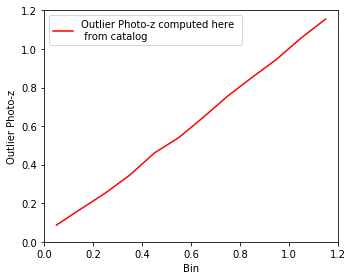

In [28]:
plt.rcParams['figure.figsize'] = [5,4]

plt.xlabel('Bin')
plt.ylabel('Outlier Photo-z')
plt.tight_layout()

plt.plot(tzpz_outt.Bin,tzpz_outt.z_phot_mean,c='r',label='Outlier Photo-z computed here \n from catalog')
plt.xlim(0,1.2)
plt.ylim(0,1.2)
plt.legend()

# 24 Bins

In [29]:
bb

,z_true,z_phot,bin_z
0,0.0170,0.0461,"(0.0, 0.1]"
1,0.0202,0.0494,"(0.0, 0.1]"
2,0.0205,0.0224,"(0.0, 0.1]"
3,0.0222,0.0875,"(0.0, 0.1]"
4,0.0223,0.2089,"(0.0, 0.1]"
...,...,...,...
178457,3.4967,3.4699,NaN
178458,3.4969,3.4647,NaN
178459,3.4971,0.4368,NaN
178460,3.4981,3.3841,NaN


In [30]:
tzpz_out

,zphoto,zspec,bin_z
0,0.5788,0.0830,"(0.0, 0.1]"
1,0.5693,0.0901,"(0.0, 0.1]"
2,0.5879,0.1271,"(0.1, 0.2]"
3,2.9107,0.1281,"(0.1, 0.2]"
4,0.5324,0.1304,"(0.1, 0.2]"
...,...,...,...
3527,1.6354,3.4852,NaN
3528,0.4550,3.4864,NaN
3529,0.8217,3.4882,NaN
3530,0.4405,3.4903,NaN


In [31]:
red = tzpz_out[tzpz_out['zspec']<=1.2]
grey = bb[bb['z_true']<=1.2]

In [32]:
grey

,z_true,z_phot,bin_z
0,0.0170,0.0461,"(0.0, 0.1]"
1,0.0202,0.0494,"(0.0, 0.1]"
2,0.0205,0.0224,"(0.0, 0.1]"
3,0.0222,0.0875,"(0.0, 0.1]"
4,0.0223,0.2089,"(0.0, 0.1]"
...,...,...,...
128245,1.1999,1.2288,"(1.1, 1.2]"
128246,1.1999,1.1999,"(1.1, 1.2]"
128247,1.2000,1.2178,"(1.1, 1.2]"
128248,1.2000,1.2274,"(1.1, 1.2]"


In [33]:
print(len(grey),'\n',len(red))

128250 
 3305


In [34]:
print('Grey                                   Red')
display_side_by_side(grey.describe(),red.describe())

Grey                                   Red


,z_true,z_phot
count,128250.000000,128250.000000
mean,0.665675,0.664627
std,0.269322,0.276635
min,0.017000,0.017000
25%,0.464100,0.462400
50%,0.649000,0.648000
75%,0.873600,0.872700
max,1.200000,3.488200
,zphoto,zspec
count,3305.000000,3305.000000


In [35]:
bins  = np.linspace(0,1.2,25)
start = (bins[0] + bins[1])/2.; end = (bins[-1] + bins[-2])/2.
print(start,end)
label = np.linspace(start,end,24)

0.024999999999999998 1.1749999999999998


In [36]:
# Binning the data to compute the mean redshifts per bin and the no. of candidates
#bins = np.linspace(0,1.2,13)
#label = np.linspace(0.05,1.15,12)


# Calling the 'tzpz_main_points' file and extracting pts < 1.5 COR
bb = grey.iloc[:, :2]


bb['bin_z'] = pd.cut(bb.z_true, bins=bins)#, labels=label)

N = pd.DataFrame(bb.groupby(pd.cut(bb.z_true, bins=bins,labels=label)).count()).z_true
N = pd.DataFrame(np.array(N))
N.columns = ['N']
N.reset_index(drop=True, inplace=True)

tzpz_main = bb.groupby(pd.cut(bb.z_true, bins=bins,labels=label)).mean()
tzpz_main.columns = ['z_true_mean','z_phot_mean']
tzpz_main.reset_index(drop=True, inplace=True)
#tzpz_main_points = tzpz_main
tzpz_main =  pd.concat([tzpz_main,N],axis=1,ignore_index=True)
tzpz_main =  pd.concat([tzpz_main,pd.DataFrame(label)],axis=1,ignore_index=True)
tzpz_main.columns = ['z_true_mean','z_phot_mean','N','Bin']
tzpz_main = tzpz_main[['Bin','N','z_true_mean','z_phot_mean']]
tzpz_main = tzpz_main.iloc[0:24 , : ]
#tzpz_main = tzpz_main.sort_values('z_true_mean')  
tzpz_main

,Bin,N,z_true_mean,z_phot_mean
0,0.025,74,0.039312,0.065124
1,0.075,1230,0.082405,0.089037
2,0.125,960,0.131160,0.131329
3,0.175,1515,0.177823,0.185987
4,0.225,3753,0.218346,0.234216
5,0.275,5961,0.271649,0.284120
6,0.325,5047,0.320510,0.329498
7,0.375,4114,0.378426,0.400753
8,0.425,6569,0.426544,0.433415
9,0.475,8744,0.472795,0.459253


In [37]:
np.min(grey.z_true)

0.017

In [38]:
np.min(red.zspec)

0.083

In [39]:
bins

array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  , 1.05,
       1.1 , 1.15, 1.2 ])

In [40]:
#bins = np.linspace(0,1.2,13)
#label = np.linspace(0.05,1.15,12)
tzpz_out_COR = red
tzpz_out_COR = tzpz_out_COR[['zphoto','zspec']]
tzpz_out_COR.columns=['z_phot','z_true']
tzpz_out_COR['bin_z'] = pd.cut(tzpz_out_COR.z_true, bins=bins)#, labels=label)

N = pd.DataFrame(tzpz_out_COR.groupby(pd.cut(tzpz_out_COR.z_true, bins=bins,labels=label)).count()).z_true
N = pd.DataFrame(np.array(N))
N.columns = ['N']
N.reset_index(drop=True, inplace=True)
#tzpz_out_COR = tzpz_out_COR.drop(['COR_val'],axis=1)
print(N)
tzpz_outt = tzpz_out_COR.groupby(pd.cut(tzpz_out_COR.z_true, bins=bins,labels=label)).mean()
print(tzpz_outt)
tzpz_outt.columns = ['z_true_mean','z_phot_mean']
tzpz_outt.reset_index(drop=True, inplace=True)

tzpz_outt =  pd.concat([tzpz_outt,N],axis=1,ignore_index=True)
tzpz_outt =  pd.concat([tzpz_outt,pd.DataFrame(label)],axis=1,ignore_index=True)
tzpz_outt.columns = ['z_true_mean','z_phot_mean','N','Bin']
tzpz_outt = tzpz_outt[['Bin','N','z_true_mean','z_phot_mean']]
tzpz_outt = tzpz_outt.iloc[0:24 , :]
#tzpz_outt = tzpz_outt.sort_values('z_true_mean')  
tzpz_outt['f_out'] = tzpz_outt.N/(tzpz_main.N)
#tzpz_outt

      N
0     0
1     2
2     9
3    44
4   225
5   406
6   351
7   289
8   249
9   541
10  317
11  161
12   93
13   56
14   73
15  107
16   77
17  114
18   77
19   42
20   13
21   20
22   18
23   21
          z_phot    z_true
z_true                    
0.025        NaN       NaN
0.075   0.574050  0.086550
0.125   0.796567  0.134656
0.175   0.499507  0.177557
0.225   0.496696  0.218480
0.275   0.483156  0.271906
0.325   0.470296  0.322380
0.375   0.472419  0.374895
0.425   0.389535  0.426309
0.475   0.376948  0.475789
0.525   0.388216  0.523917
0.575   0.470396  0.573058
0.625   0.567862  0.629255
0.675   0.663021  0.672025
0.725   0.715179  0.730973
0.775   0.701030  0.772748
0.825   0.733136  0.823145
0.875   0.755490  0.873046
0.925   0.828935  0.931197
0.975   0.935993  0.974993
1.025   1.058677  1.027023
1.075   1.095630  1.076175
1.125   1.022406  1.128822
1.175   1.017595  1.177600


In [41]:
tzpz_outt = tzpz_outt.fillna(0)

In [42]:
test = pd.concat([tzpz_main,tzpz_outt.iloc[: , 1:]],axis=1)
test.columns = ['Bin','N_G','z_true_mean_G','z_phot_mean_G','N_R','z_true_mean_R','z_phot_mean_R','fout']
test['COR_Outlier_Bias'] = (test.z_true_mean_R - test.z_phot_mean_R)/(1+test.z_phot_mean_R)

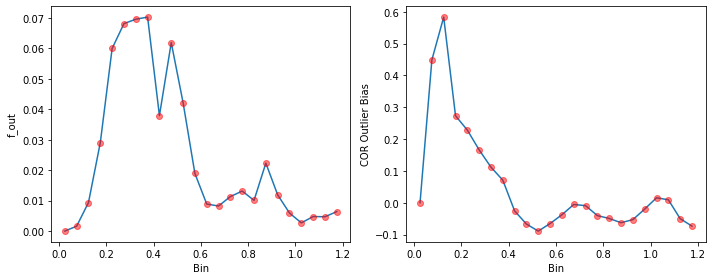

In [43]:
plt.rcParams['figure.figsize'] = [10,4]
plt.subplot(1,2,1)
plt.plot(test.Bin,test.fout)
plt.plot(test.Bin,test.fout,'o',c='r',alpha=0.5)
plt.xlabel('Bin')
plt.ylabel('f_out')
plt.tight_layout()
plt.subplot(1,2,2)
plt.plot(test.Bin,test.COR_Outlier_Bias)
plt.plot(test.Bin,test.COR_Outlier_Bias,'o',c='r',alpha=0.5)
plt.xlabel('Bin')
plt.ylabel('COR Outlier Bias')
plt.tight_layout()

In [44]:
test

,Bin,N_G,z_true_mean_G,z_phot_mean_G,N_R,z_true_mean_R,z_phot_mean_R,fout,COR_Outlier_Bias
0,0.025,74,0.039312,0.065124,0,0.000000,0.000000,0.000000,0.000000
1,0.075,1230,0.082405,0.089037,2,0.574050,0.086550,0.001626,0.448668
2,0.125,960,0.131160,0.131329,9,0.796567,0.134656,0.009375,0.583359
3,0.175,1515,0.177823,0.185987,44,0.499507,0.177557,0.029043,0.273405
4,0.225,3753,0.218346,0.234216,225,0.496696,0.218480,0.059952,0.228330
5,0.275,5961,0.271649,0.284120,406,0.483156,0.271906,0.068109,0.166089
6,0.325,5047,0.320510,0.329498,351,0.470296,0.322380,0.069546,0.111855
7,0.375,4114,0.378426,0.400753,289,0.472419,0.374895,0.070248,0.070932
8,0.425,6569,0.426544,0.433415,249,0.389535,0.426309,0.037905,-0.025783
9,0.475,8744,0.472795,0.459253,541,0.376948,0.475789,0.061871,-0.066975


In [45]:
test.to_csv('tzpz_bin_data_WFIRST_24.csv',sep=' ',index=False)